In [2]:
!pip install tensorflow

     |████████████████████████████████| 120.8 MB 187 kB/s  eta 0:00:01
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
     |████████████████████████████████| 448 kB 27.1 MB/s eta 0:00:01
     |████████████████████████████████| 2.6 MB 25.5 MB/s eta 0:00:01
     |████████████████████████████████| 3.8 MB 11.6 MB/s eta 0:00:01
  Using cached absl-py-0.9.0.tar.gz (104 kB)
  Using cached opt_einsum-3.2.1-py3-none-any.whl (63 kB)
  Using cached Keras_Preprocessing-1.1.0-py2.py3-none-any.whl (41 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     |████████████████████████████████| 50 kB 24.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 32.1 MB/s eta 0:00:01
  Using cached Markdown-3.2.1-py2.py3-none-any.whl (88 kB)
  Using cached google_auth-1.14.0-py2.py3-none-any.whl (88 kB)
  Using cached google_auth_oauthlib-0.4.1-py2.py3-none-any.whl (18 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached rsa-4.0-py2.py3-none-any.whl (38 

In [3]:
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf

In [4]:
df = pd.read_csv('./data/training_data.csv')

In [5]:
df.head()

MOVE1 MOVE2 MOVE3 MOVE4 MOVE5 MOVE6 MOVE7 CLASS
0      0     8     1     3     ?     ?     ?  loss
1      4     7     2     6     ?     ?     ?   win
2      0     8     1     6     5     ?     ?  draw
3      4     7     2     3     ?     ?     ?  draw
4      0     4     2     1     ?     ?     ?   win

In [6]:
#is_win = df['CLASS'] == 'win'

In [7]:
#df_win = df[is_win]
df_win = df

In [8]:
df_win.replace(inplace=True, to_replace='?', value=-1)

In [9]:
df_win = df_win.drop(columns=['CLASS'])

In [10]:
df_win = df_win.astype('int32')

In [11]:
df_win.head(5)

MOVE1  MOVE2  MOVE3  MOVE4  MOVE5  MOVE6  MOVE7
0      0      8      1      3     -1     -1     -1
1      4      7      2      6     -1     -1     -1
2      0      8      1      6      5     -1     -1
3      4      7      2      3     -1     -1     -1
4      0      4      2      1     -1     -1     -1

In [12]:
_tdata = []
for row in df_win.iterrows():
    l = list(row[1])
    for i, coldata in enumerate(l, start=1):
        if coldata == -1:
            break
        _newdata = [-1, -1, -1, -1, -1, -1, -1, -1, -1]
        #set the lable first
        _newdata[8] = coldata
        # take the first i items
        _data = l[:i-1]
        del _newdata[:i-1]
        _data.extend(_newdata)
        _tdata.append(_data)

In [13]:
_trainingdf = pd.DataFrame(columns=['MOVE1', 'MOVE2', 'MOVE3', 'MOVE4', 'MOVE5', 'MOVE6', 'MOVE7', 'MOVE8', 'LABEL'])
_trainingdfnn = pd.DataFrame(columns=['DATA', 'LABEL'])

In [14]:
_trainingx = []
_trainingy = []
_value = []
for row in _tdata:
    _x = row[:8]
    _trainingx.append(_x)
    # transform data to categorical
    _i = row[8]
    _value.append(_i)
    _y = [0, 0, 0, 0, 0, 0, 0, 0, 0]
    # set the ttt square that the next move should be
    _y[_i] = 1
    _trainingy.append(_y)

In [15]:
print(_value[0], _trainingy[0])

0 [1, 0, 0, 0, 0, 0, 0, 0, 0]


In [16]:
batch_size = 10

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, input_shape=[8]),
    tf.keras.layers.Dense(units=9, activation='sigmoid')
])

In [18]:
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(0.01))

In [19]:
history = model.fit(_trainingx, _trainingy, epochs=60, verbose=True, batch_size=batch_size)
print("Finished training the model")

Train on 9343 samples
Epoch 1/60
9343/9343 [==============================] - 1s 98us/sample - loss: 0.0999
Epoch 2/60
9343/9343 [==============================] - 1s 80us/sample - loss: 0.0965
Epoch 3/60
9343/9343 [==============================] - 1s 85us/sample - loss: 0.0963
Epoch 4/60
9343/9343 [==============================] - 1s 84us/sample - loss: 0.0962
Epoch 5/60
9343/9343 [==============================] - 1s 89us/sample - loss: 0.0962
Epoch 6/60
9343/9343 [==============================] - 1s 83us/sample - loss: 0.0961
Epoch 7/60
9343/9343 [==============================] - 1s 82us/sample - loss: 0.0962
Epoch 8/60
9343/9343 [==============================] - 1s 86us/sample - loss: 0.0960
Epoch 9/60
9343/9343 [==============================] - 1s 79us/sample - loss: 0.0962
Epoch 10/60
9343/9343 [==============================] - 1s 75us/sample - loss: 0.0961
Epoch 11/60
9343/9343 [==============================] - 1s 75us/sample - loss: 0.0962
Epoch 12/60
9343/9343 [=======

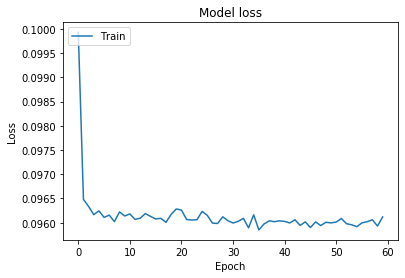

In [20]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [21]:
_pred = model.predict([[2, 6, 8, 3, -1, -1, -1, -1]])
print(_pred[0])

[0.09044689 0.16261992 0.1782875  0.1146916  0.00150058 0.12927814
 0.05378273 0.13726375 0.10874482]


In [22]:
def next_move(pred_vals):
    _preditems = []
    for i, item in enumerate(pred_vals):
        _preditems.append({'idx': i, 'val': item})
    _preditems.sort(key=lambda x: x['val'], reverse=True)
    return _preditems

In [23]:
next_move(_pred[0])

[{'idx': 2, 'val': 0.1782875},
 {'idx': 1, 'val': 0.16261992},
 {'idx': 7, 'val': 0.13726375},
 {'idx': 5, 'val': 0.12927814},
 {'idx': 3, 'val': 0.1146916},
 {'idx': 8, 'val': 0.10874482},
 {'idx': 0, 'val': 0.09044689},
 {'idx': 6, 'val': 0.053782728},
 {'idx': 4, 'val': 0.0015005792}]

In [28]:
model.save("model_v2.h5")

In [ ]:
!pip install tensorflowjs

In [ ]:
import tensorflowjs as tfjs

tfjs.converters.save_keras_model(model, './')